Turn on the GPU in Change Runtime Type in Runtime Menu
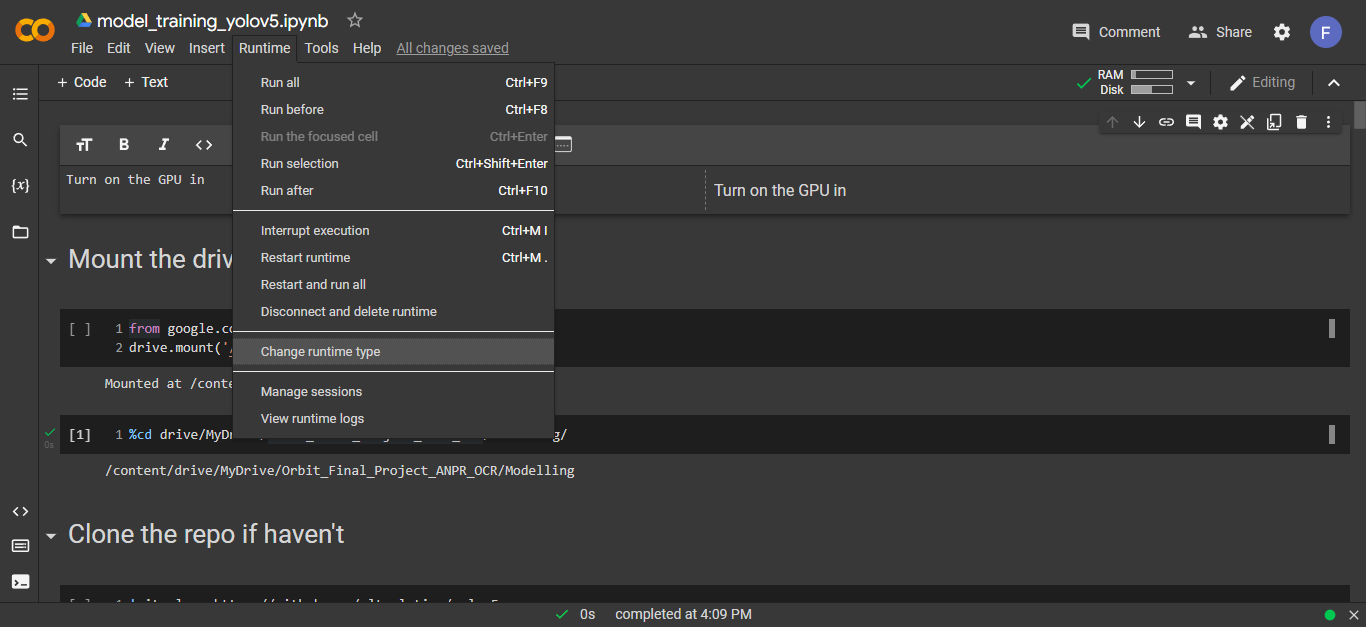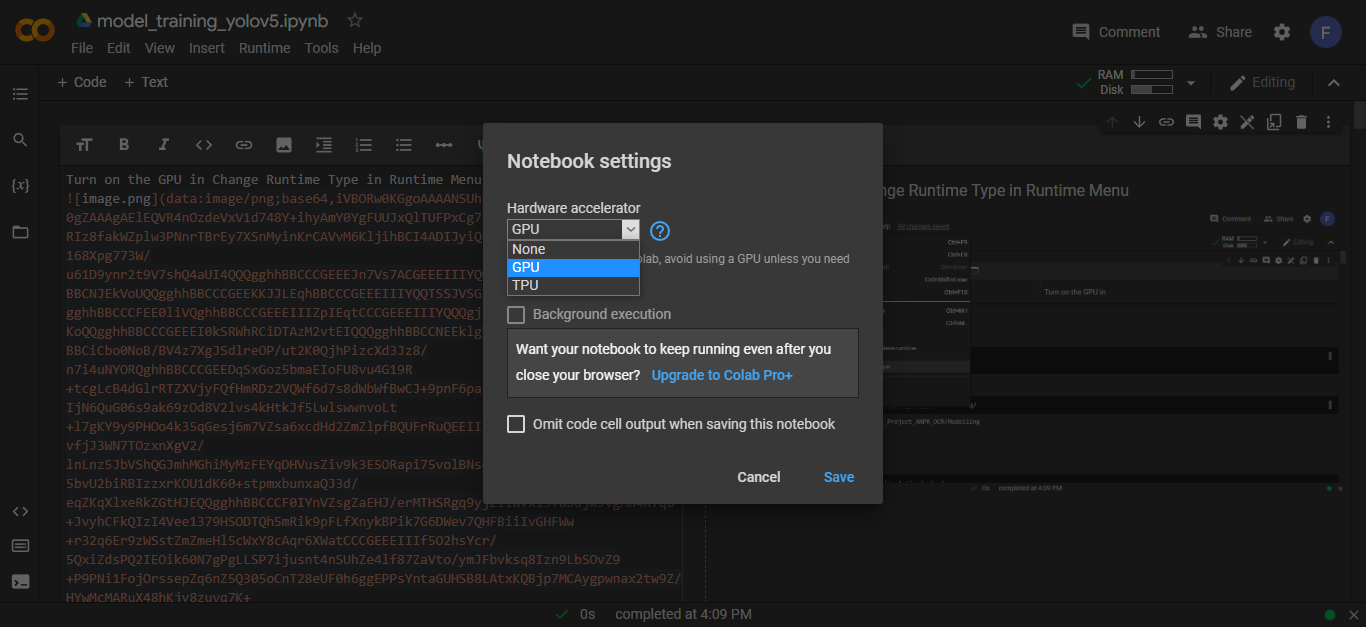

# Mount the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# If had already cloned the repo cd with command below

In [2]:
%cd drive/MyDrive/Orbit_Final_Project_ANPR_OCR/Modelling/yolov5

[Errno 2] No such file or directory: 'drive/MyDrive/Orbit_Final_Project_ANPR_OCR/Modelling/yolov5'
/content/drive/MyDrive/Orbit_Final_Project_ANPR_OCR/Modelling


#Clone the repo if haven't

## Change directory first

In [ ]:
%cd drive/MyDrive/Orbit_Final_Project_ANPR_OCR/Modelling/

/content/drive/MyDrive/Orbit_Final_Project_ANPR_OCR/Modelling


## Then Clone

In [6]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12173, done.
remote: Total 12173 (delta 0), reused 0 (delta 0), pack-reused 12173
Receiving objects: 100% (12173/12173), 11.96 MiB | 9.18 MiB/s, done.
Resolving deltas: 100% (8428/8428), done.


## Then Change the directory to yolov5

In [5]:
%cd yolov5

/content/drive/MyDrive/Orbit_Final_Project_ANPR_OCR/Modelling/yolov5


In [7]:
import os

# Install the required library inside requirements.txt 

In [6]:
%%bash
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Train Model

In [ ]:
!python train.py --data data.yaml --cfg yolov5s.yaml --batch-size 32 --name Plate_Detection_Model --epochs 1000

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1000, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Plate_Detection_Model, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
YOLOv5 🚀 v6.1-235-g632559b Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamm

# Save the Model to .onnx

In [ ]:
!python export.py --weights runs/train/Plate_Detection_Model/weights/best.pt --include torchscript onnx

export: data=data/coco128.yaml, weights=['runs/train/Plate_Detection_Model/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v6.1-235-g632559b Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/Plate_Detection_Model/weights/best.pt with output shape (1, 25200, 6) (13.8 MB)

TorchScript: starting export with torch 1.11.0+cu113...
TorchScript: export success, saved as runs/train/Plate_Detection_Model/weights/best.torchscript (27.2 MB)
requirements: onnx not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pk